In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocess import *
from utils.model import *
import datetime
import tqdm

In [2]:
train_data = read_data('train')
test_data = read_data('test')

train_y = read_target_train()

## Получение данных о продолжительности различных операций

In [2]:
def cat_preprocess(df, drop_cols, encode_col):
    df = df.drop(drop_cols, axis = 1)
    df = pd.get_dummies(df, columns=[encode_col])
    return df

In [5]:
def cat_feat_extr(df, cols, ves_col):
    for NPLV in tqdm(df.NPLV.unique()):
        try:
            for col in cols:
                if not df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()].empty: 
                    for i in range(len(df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()])):
                        df.at[df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()[i], col] = \
                                df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()[i]]
        except:
            try:
                for col in cols:
                    if not df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()].empty: 
                        for i in range(len(df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()])):
                            df.at[df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()[i], col] = \
                                    df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()[i]]
            except:
                try:
                    for col in cols:
                        if not df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()].empty: 
                            for i in range(len(df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()])):
                                df.at[df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()[i], col] = \
                                        df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()[i]]
                except:
                    for col in cols:
                        if not df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()].empty: 
                            for i in range(len(df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()])):
                                df.at[df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()[i], col] = \
                                        df[ves_col][df.index[(df['NPLV'] == NPLV) & (df[col] > 0)].to_list()[i]]
                    
    df = df.drop([ves_col], axis = 1).groupby('NPLV').agg('sum')
    
    return df

хронометраж - время начала и конца различных операций во время плавки

In [9]:
train_data['chronom'].head()

,NPLV,TYPE_OPER,NOP,VR_NACH,VR_KON,O2
0,510008,межпл.прост.,межпл. простой,2011-01-01 10:28:13,2011-01-01 10:32:15,NaN
1,510008,межпл.прост.,межпл. простой,2021-01-01 03:01:07,2021-01-01 03:08:11,NaN
2,510008,межпл.прост.,Осмотр конвертера,2021-01-01 03:01:19,2021-01-01 03:03:43,NaN
3,510008,межпл.прост.,Наведение гарнисажа,2021-01-01 03:03:43,2021-01-01 03:05:23,NaN
4,510008,межпл.прост.,Слив шлака,2021-01-01 03:05:23,2021-01-01 03:06:09,NaN


In [10]:
test_data['chronom'].head()

,NPLV,TYPE_OPER,NOP,VR_NACH,VR_KON,O2
0,512324,межпл.прост.,межпл. простой,2011-05-07 21:28:59,2011-05-07 21:33:38,NaN
1,512324,межпл.прост.,межпл. простой,2021-05-05 17:35:55,2021-05-05 17:41:21,NaN
2,512324,межпл.прост.,Осмотр конвертера,2021-05-05 17:36:07,2021-05-05 17:39:07,NaN
3,512324,межпл.прост.,Слив шлака,2021-05-05 17:39:07,2021-05-05 17:41:20,NaN
4,512324,опер,Завалка лома,2021-05-05 17:41:21,2021-05-05 17:43:16,NaN


In [11]:
train_data['chronom']['VR_NACH'] = pd.to_datetime(train_data['chronom']['VR_NACH'])
train_data['chronom']['VR_KON'] = pd.to_datetime(train_data['chronom']['VR_KON'])
train_data['chronom']['duration'] = (train_data['chronom']['VR_KON'] - train_data['chronom']['VR_NACH']).dt.total_seconds()

test_data['chronom']['VR_NACH'] = pd.to_datetime(test_data['chronom']['VR_NACH'])
test_data['chronom']['VR_KON'] = pd.to_datetime(test_data['chronom']['VR_KON'])
test_data['chronom']['duration'] = (test_data['chronom']['VR_KON'] - test_data['chronom']['VR_NACH']).dt.total_seconds()

train_data['chronom'].head()

,NPLV,TYPE_OPER,NOP,VR_NACH,VR_KON,O2,duration
0,510008,межпл.прост.,межпл. простой,2011-01-01 10:28:13,2011-01-01 10:32:15,NaN,242.0
1,510008,межпл.прост.,межпл. простой,2021-01-01 03:01:07,2021-01-01 03:08:11,NaN,424.0
2,510008,межпл.прост.,Осмотр конвертера,2021-01-01 03:01:19,2021-01-01 03:03:43,NaN,144.0
3,510008,межпл.прост.,Наведение гарнисажа,2021-01-01 03:03:43,2021-01-01 03:05:23,NaN,100.0
4,510008,межпл.прост.,Слив шлака,2021-01-01 03:05:23,2021-01-01 03:06:09,NaN,46.0


In [12]:
names_train_nop = train_data['chronom']['NOP'].value_counts()
names_train_nop_stay = set(names_train_nop[names_train_nop > 100].to_dict().keys())
names_train_nop = set(names_train_nop.to_dict().keys())

names_test_nop = set(test_data['chronom']['NOP'].value_counts().to_dict().keys())

name_to_stay = names_train_nop_stay.intersection(names_test_nop)

In [13]:
names_to_del_train = names_train_nop.difference(name_to_stay)
names_to_del_test = names_test_nop.difference(name_to_stay)

In [14]:
prep_chronom_train = cat_preprocess(train_data['chronom'], ['TYPE_OPER', 'VR_NACH', 'VR_KON', 'O2'], 'NOP')
prep_chronom_test = cat_preprocess(test_data['chronom'], ['TYPE_OPER', 'VR_NACH', 'VR_KON', 'O2'], 'NOP')

In [15]:
prep_chronom_train_cols = list(prep_chronom_train.columns.drop(['NPLV', 'duration']))
prep_chronom_test_cols = list(prep_chronom_test.columns.drop(['NPLV', 'duration']))

In [16]:
prep_chronom_train = prep_chronom_train.fillna(0)
prep_chronom_test = prep_chronom_test.fillna(0)

prep_chronom_train['duration'] = prep_chronom_train['duration'].astype('int64')
prep_chronom_test['duration'] = prep_chronom_test['duration'].astype('int64')

In [17]:
prep_chronom_train[prep_chronom_train_cols] = prep_chronom_train[prep_chronom_train_cols].astype('int64')
prep_chronom_test[prep_chronom_test_cols] = prep_chronom_test[prep_chronom_test_cols].astype('int64')

In [22]:
cat_chronom_train = cat_feat_extr(prep_chronom_train, prep_chronom_train_cols, 'duration')
cat_chronom_test = cat_feat_extr(prep_chronom_test, prep_chronom_test_cols, 'duration')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 780/780 [00:18<00:00, 41.55it/s]


In [23]:
for col in names_to_del_train:
    col_ = 'NOP_' + col
    del cat_chronom_train[col_]

for col in names_to_del_test:
    col_ = 'NOP_' + col
    del cat_chronom_test[col_]

In [26]:
cat_chronom_train.to_csv('data_chronom/chronom_duration_train.csv')
cat_chronom_test.to_csv('data_chronom/chronom_duration_test.csv')

## Конец получения фичей chronom_duration

In [3]:
cat_chronom_train = pd.read_csv('data_chronom/chronom_duration_train.csv')
cat_chronom_test = pd.read_csv('data_chronom/chronom_duration_test.csv')



In [4]:
train_gas = pd.read_csv('data/gas_train.csv')
test_gas = pd.read_csv('data/gas_test.csv')

In [5]:
train_gas['Time'] = pd.to_datetime(train_gas['Time'])
test_gas['Time'] = pd.to_datetime(test_gas['Time'])

train_data['chronom']['VR_NACH'] = pd.to_datetime(train_data['chronom']['VR_NACH'])
test_data['chronom']['VR_NACH'] = pd.to_datetime(test_data['chronom']['VR_NACH'])
train_data['chronom']['VR_KON'] = pd.to_datetime(train_data['chronom']['VR_KON'])
test_data['chronom']['VR_KON'] = pd.to_datetime(test_data['chronom']['VR_KON'])

In [14]:
row = train_data['chronom'][train_data['chronom']['NOP'] == 'Продувка'].set_index('NPLV')
start_train_nach = row['VR_NACH']
end_train_nach = row['VR_KON']

row = test_data['chronom'][test_data['chronom']['NOP'] == 'Продувка'].set_index('NPLV')
start_test_nach = row['VR_NACH']
end_test_nach = row['VR_KON']

In [29]:
%%time

for nplv_obj in tqdm.tqdm(train_gas['NPLV'].unique()):
    df_nplv = train_gas[(train_gas['NPLV'] == nplv_obj) & \
                        ((train_gas['Time'] - start_train_nach[nplv_obj]).dt.total_seconds() <= 1) & \
                        ((train_gas['Time'] - start_train_nach[nplv_obj]).dt.total_seconds() >= 0)]
    cat_chronom_train.at[nplv_obj, 'O2_start_Продувка'] = df_nplv['O2']
    cat_chronom_train.at[nplv_obj, 'V_start_Продувка'] = df_nplv['V']
    cat_chronom_train.at[nplv_obj, 'T_start_Продувка'] = df_nplv['T']
    cat_chronom_train.at[nplv_obj, 'N2_start_Продувка'] = df_nplv['N2']
    cat_chronom_train.at[nplv_obj, 'H2_start_Продувка'] = df_nplv['H2']
    cat_chronom_train.at[nplv_obj, 'CO2_start_Продувка'] = df_nplv['CO2']
    cat_chronom_train.at[nplv_obj, 'AR_start_Продувка'] = df_nplv['AR']
    cat_chronom_train.at[nplv_obj, 'O2_pressure_start_Продувка'] = df_nplv['O2_pressure']   

  0%|▍                                                                                        | 10/2063 [00:05<17:28,  1.96it/s]


KeyboardInterrupt: 

In [31]:
cat_chronom_train

,NOP_Вхождение в гр.МНЛЗ,NOP_Завалка лома,NOP_Заливка чугуна,NOP_Наведение гарнисажа,NOP_Нагрев лома,NOP_Наложение продувки,NOP_Неиспр. электр. обор,NOP_Обрыв горловины,NOP_Осмотр конвертера,NOP_Отсутствие O2,...,NOP_Слив шлака,NOP_межпл. простой,O2_start_Продувка,V_start_Продувка,T_start_Продувка,N2_start_Продувка,H2_start_Продувка,CO2_start_Продувка,AR_start_Продувка,O2_pressure_start_Продувка
NPLV,,,,,,,,,,,,,,,,,,,,,
510008.0,0.0,16.0,203.0,100.0,730.0,0.0,0.0,0.0,144.0,126.0,...,46.0,666.0,19.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510009.0,620.0,31.0,188.0,112.0,788.0,0.0,0.0,0.0,198.0,440.0,...,118.0,845.0,19.170000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510010.0,0.0,133.0,209.0,136.0,738.0,0.0,0.0,0.0,102.0,0.0,...,55.0,614.0,20.219999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510011.0,0.0,17.0,175.0,184.0,776.0,0.0,0.0,541.0,0.0,0.0,...,42.0,1401.0,20.775720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510012.0,0.0,136.0,184.0,133.0,736.0,0.0,0.0,0.0,120.0,0.0,...,49.0,929.0,19.790001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512319.0,0.0,1415.0,224.0,160.0,0.0,0.0,0.0,0.0,63.0,0.0,...,33.0,1530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512320.0,0.0,534.0,315.0,182.0,0.0,0.0,0.0,438.0,62.0,0.0,...,199.0,885.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512321.0,462.0,645.0,160.0,167.0,0.0,0.0,0.0,0.0,38.0,0.0,...,150.0,908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for nplv_obj in tqdm.tqdm(test_gas['NPLV'].unique()):
    df_nplv = test_gas[(test_gas['NPLV'] == nplv_obj) & \
                        ((test_gas['Time'] - start_test_nach[nplv_obj]).dt.total_seconds() <= 1) & \
                        ((test_gas['Time'] - start_test_nach[nplv_obj]).dt.total_seconds() >= 0)]
    cat_chronom_test['O2_start_Продувка'] = df_nplv['O2']
    cat_chronom_test['V_start_Продувка'] = df_nplv['V']
    cat_chronom_test['T_start_Продувка'] = df_nplv['T']
    cat_chronom_test['N2_start_Продувка'] = df_nplv['N2']
    cat_chronom_test['H2_start_Продувка'] = df_nplv['H2']
    cat_chronom_test['CO2_start_Продувка'] = df_nplv['CO2']
    cat_chronom_test['AR_start_Продувка'] = df_nplv['AR']
    cat_chronom_test['O2_pressure_start_Продувка'] = df_nplv['O2_pressure']   

In [ ]:
for nplv_obj in tqdm.tqdm(train_gas['NPLV'].unique()):
    df_nplv = train_gas[(train_gas['NPLV'] == nplv_obj) & \
                        ((end_train_nach[nplv_obj]- train_gas['Time']).dt.total_seconds() <= 1) & \
                        ((end_train_nach[nplv_obj]- train_gas['Time']).dt.total_seconds() >= 0)]
    cat_chronom_train['O2_start_Продувка'] = df_nplv['O2']
    cat_chronom_train['V_start_Продувка'] = df_nplv['V']
    cat_chronom_train['T_start_Продувка'] = df_nplv['T']
    cat_chronom_train['N2_start_Продувка'] = df_nplv['N2']
    cat_chronom_train['H2_start_Продувка'] = df_nplv['H2']
    cat_chronom_train['CO2_start_Продувка'] = df_nplv['CO2']
    cat_chronom_train['AR_start_Продувка'] = df_nplv['AR']
    cat_chronom_train['O2_pressure_start_Продувка'] = df_nplv['O2_pressure']   

In [ ]:
for nplv_obj in tqdm.tqdm(test_gas['NPLV'].unique()):
    df_nplv = test_gas[(test_gas['NPLV'] == nplv_obj) & \
                        ((test_gas['Time'] - start_test_nach[nplv_obj]).dt.total_seconds() <= 1) & \
                        ((test_gas['Time'] - start_test_nach[nplv_obj]).dt.total_seconds() >= 0)]
    cat_chronom_test['O2_start_Продувка'] = df_nplv['O2']
    cat_chronom_test['V_start_Продувка'] = df_nplv['V']
    cat_chronom_test['T_start_Продувка'] = df_nplv['T']
    cat_chronom_test['N2_start_Продувка'] = df_nplv['N2']
    cat_chronom_test['H2_start_Продувка'] = df_nplv['H2']
    cat_chronom_test['CO2_start_Продувка'] = df_nplv['CO2']
    cat_chronom_test['AR_start_Продувка'] = df_nplv['AR']
    cat_chronom_test['O2_pressure_start_Продувка'] = df_nplv['O2_pressure']   

In [10]:
df_nplv

,NPLV,Time,V,T,O2,N2,H2,CO2,CO,AR,T фурмы 1,T фурмы 2,O2_pressure
219186,510092,2021-01-04 23:59:46.437,220058.921875,694.097229,14.77,78.400002,0.0,5.4,0.41,1.02,0.0,0.0,15.306713


In [47]:
train_gas[(train_gas['NPLV'] == 510008) & ((train_gas['Time'] - start[510008]).dt.total_seconds() <= 1) & ((train_gas['Time'] - start[510008]).dt.total_seconds() >= 0)]

,NPLV,Time,V,T,O2,N2,H2,CO2,CO,AR,T фурмы 1,T фурмы 2,O2_pressure
610,510008,2021-01-01 03:18:25.437,211585.734375,455.208344,19.92,79.089996,0.02,0.05,0.0,0.84,0.0,0.0,13.715278


In [223]:
# зафиксировать количество кислорода во время этих событий
cat_chronom_train[list(name_to_stay)]

KeyError: "None of [Index(['Слив шлака', 'Подварка  футеровки', 'Наложение продувки',\n       'Осмотр конвертера', 'межпл. простой', 'Отсутствие чугуна',\n       'Наведение гарнисажа', 'Обрыв горловины', 'Вхождение в гр.МНЛЗ',\n       'Заливка чугуна', 'Полусухое торкрет.', 'Завалка лома', 'Отсутствие O2',\n       'Неиспр. электр. обор', 'Нагрев лома', 'Продувка'],\n      dtype='object')] are in the [columns]"

In [215]:
train_data['reduced_gas']

,Time,NPLV,V,T,O2,N2,H2,CO2,CO,AR,T фурмы 1,T фурмы 2,O2_pressure
0,2021-01-01 03:18:25.437,510008,211585.734375,455.208344,19.920000,79.089996,0.02,0.050000,0.00,0.84,0.000000,0.000000,13.715278
1,2021-01-01 03:18:26.437,510008,211804.406250,458.680573,17.360001,80.870003,0.04,0.850000,0.07,0.84,0.000000,0.000000,13.664640
2,2021-01-01 03:18:27.437,510008,212350.156250,461.805542,9.930000,88.860001,0.04,0.540000,0.00,0.62,0.000000,0.000000,13.599537
3,2021-01-01 03:18:28.437,510008,212132.031250,467.361115,2.280000,97.160004,0.07,0.100000,0.00,0.39,0.000000,0.000000,13.541667
4,2021-01-01 03:18:29.437,510008,212132.031250,467.361115,2.280000,97.160004,0.07,0.100000,0.00,0.39,0.000000,0.000000,13.541667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373699,2021-04-26 18:31:21.437,512322,210268.781250,852.430542,0.000000,56.369999,0.85,28.100000,13.94,0.74,38.831020,26.620371,14.807580
2373700,2021-04-26 18:31:22.437,512322,209054.296875,852.777771,0.000000,56.669998,0.83,28.270000,13.47,0.76,38.831020,26.620371,14.822048
2373701,2021-04-26 18:31:23.437,512322,209607.218750,853.125000,0.000000,56.950001,0.78,28.389999,13.12,0.76,38.802086,26.620371,14.822048
2373702,2021-04-26 18:31:24.437,512322,210708.687500,853.819458,0.000000,56.860001,0.77,28.219999,13.41,0.75,38.773148,26.620371,14.822048


#### Код Сережи

In [205]:
!pip install category_encoders

In [206]:
from category_encoders import TargetEncoder

def first_preprocess_plavki(plavki):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    plavki = plavki.copy()
    
    new_plavki = pd.DataFrame()
    for NPLV in plavki.NPLV.unique():
        cur_ts = plavki[plavki['NPLV'] == NPLV]
        new_ts = cur_ts.iloc[0:1,:]
        new_ts[new_ts.select_dtypes(include=numerics).columns] = pd.DataFrame(cur_ts[new_ts.select_dtypes(include=numerics).columns].mean(), columns = new_ts.index).T

        new_plavki = pd.concat((new_plavki, new_ts))
    new_plavki = new_plavki.reset_index().drop(['index'], axis = 1)
    
    new_plavki['plavka time'] = (pd.to_datetime(new_plavki['plavka_VR_KON']) - pd.to_datetime(new_plavki['plavka_VR_NACH'])).dt.seconds
    new_plavki = new_plavki.drop(['plavka_VR_NACH', 'plavka_VR_KON'], axis = 1)
    return new_plavki

In [207]:
def preprocess_plavki(train_plavki, test_plavki):
    new_plavki_train = first_preprocess_plavki(train_plavki)
    new_plavki_test = first_preprocess_plavki(test_plavki)
    
    plavki_cat = ['plavka_NMZ', 'plavka_NAPR_ZAD', 'plavka_TIPE_FUR', 'plavka_TIPE_GOL']
    for col in plavki_cat:
        new_plavki_train[col + '_C'] = new_plavki_train[col]
        new_plavki_test[col + '_C']  = new_plavki_test[col] 
        new_plavki_train[col + '_TST'] = new_plavki_train[col]
        new_plavki_test[col + '_TST']  = new_plavki_test[col]
        
    target = read_target_train()
    
    encoder_C = TargetEncoder(cols = list(map(lambda x: x + '_C', plavki_cat)))
    encoder_TST = TargetEncoder(cols = list(map(lambda x: x + '_TST', plavki_cat)))
    encoder_C.fit(new_plavki_train, target['C'])
    encoder_TST.fit(new_plavki_train, target['TST'])
    
    new_plavki_train = encoder_C.transform(new_plavki_train)
    new_plavki_test = encoder_C.transform(new_plavki_test)
    new_plavki_train = encoder_TST.transform(new_plavki_train)
    new_plavki_test = encoder_TST.transform(new_plavki_test)
    
    return new_plavki_train, new_plavki_test
    

In [208]:
new_plavki_train, new_plavki_test = preprocess_plavki(train_data['plavki'], test_data['plavki'])
new_plavki_train.to_csv(config['data_path'] + 'preprocessed_plavki_train.csv')
new_plavki_test.to_csv(config['data_path'] + 'preprocessed_plavki_test.csv')

In [210]:
new_plavki_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NPLV                 2063 non-null   float64
 1   plavka_NMZ           2063 non-null   object 
 2   plavka_NAPR_ZAD      2063 non-null   object 
 3   plavka_STFUT         2063 non-null   float64
 4   plavka_TIPE_FUR      2063 non-null   object 
 5   plavka_ST_FURM       2063 non-null   float64
 6   plavka_TIPE_GOL      2063 non-null   object 
 7   plavka_ST_GOL        2063 non-null   float64
 8   plavka time          2063 non-null   int64  
 9   plavka_NMZ_C         2063 non-null   float64
 10  plavka_NMZ_TST       2063 non-null   float64
 11  plavka_NAPR_ZAD_C    2063 non-null   float64
 12  plavka_NAPR_ZAD_TST  2063 non-null   float64
 13  plavka_TIPE_FUR_C    2063 non-null   float64
 14  plavka_TIPE_FUR_TST  2063 non-null   float64
 15  plavka_TIPE_GOL_C    2063 non-null   f

In [212]:
new_plavki_train['plavka_NMZ'].value_counts()

Ст3пс/Э            304
C071TM.z01/ЭТ      190
SC2/ЭТ             184
SC2M/ЭТ            169
SPHC.z03/ЭТ        125
                  ... 
26С2.2               1
09Г2С.4              1
СВ08Г2С.2            1
Ст3Гпс               1
10ХСНД.1             1
Name: plavka_NMZ, Length: 66, dtype: int64

In [213]:
new_plavki_train['plavka_NAPR_ZAD'].value_counts()

МНЛС    942
МНЛЗ    564
Изл     557
Name: plavka_NAPR_ZAD, dtype: int64

Химический состав и характеристики чугуна

In [7]:
train_data['chugun'] = ts_preproc(train_data['chugun'], 'DATA_ZAMERA')
train_data['chugun'].head()

,NPLV,VES,T,SI,MN,S,P,CR,NI,CU,V,TI
DATA_ZAMERA,,,,,,,,,,,,
2021-01-01 03:15:03,510008,263700.0,1396.0,0.44,0.22,0.023,0.097,0.03,0.01,0.03,0.103,0.084
2021-01-01 04:23:48,510009,264500.0,1419.0,0.68,0.20,0.017,0.087,0.02,0.01,0.03,0.084,0.096
2021-01-01 05:21:40,510010,263800.0,1384.0,0.56,0.26,0.017,0.096,0.03,0.01,0.03,0.115,0.110
2021-01-01 06:20:57,510011,264000.0,1401.0,0.48,0.27,0.018,0.091,0.03,0.01,0.02,0.112,0.110
2021-01-01 07:23:02,510012,263300.0,1422.0,0.47,0.23,0.018,0.096,0.02,0.01,0.03,0.083,0.070


Информация об анализе отходящих газов

In [8]:
train_data['gas'] = ts_preproc(train_data['gas'], 'Time')
train_data['gas'].head()

,NPLV,V,T,O2,N2,H2,CO2,CO,AR,T фурмы 1,T фурмы 2,O2_pressure
Time,,,,,,,,,,,,
2021-01-01 03:08:11.437,510008,218263.343750,262.847229,18.722993,80.132247,0.087755,0.163878,0.009229,0.893243,0.0,0.0,13.085938
2021-01-01 03:08:12.437,510008,218263.343750,262.847229,18.732721,80.138406,0.087959,0.148980,0.008390,0.892948,0.0,0.0,13.085938
2021-01-01 03:08:13.437,510008,218369.359375,262.152771,18.742449,80.144565,0.088163,0.134082,0.007551,0.892653,0.0,0.0,13.085938
2021-01-01 03:08:14.437,510008,218475.359375,261.805573,18.752177,80.150724,0.088367,0.119184,0.006712,0.892358,0.0,0.0,13.093172
2021-01-01 03:08:15.437,510008,218369.359375,260.763885,18.761905,80.156883,0.088571,0.104286,0.005873,0.892063,0.0,0.0,13.093172


 Вместе с чугуном в фурму засыпают лом - это часть технологического процесса. Таблица содержит вес и тип ломов, использованных в каждой плавке

In [23]:
train_data['lom'].head()

,NPLV,VDL,NML,VES
0,510008,4,К,56500
1,510008,8,О,16700
2,510008,13,КП,3000
3,510009,4,К,49800
4,510009,8,О,22800


Основная информация по плавке - характеристики плавки (марка металла, направление разливки) и оборудования

In [9]:
train_data['plavki'] = ts_preproc(train_data['plavki'], 'plavka_VR_NACH')
train_data['plavki'].head()

,NPLV,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL
plavka_VR_NACH,,,,,,,,,
2021-01-01 03:08:11,510008,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11
2021-01-01 04:00:44,510009,2021-01-01 05:07:28,С255,МНЛЗ,972,цилиндрическая,12,5 сопловая,12
2021-01-01 05:12:29,510010,2021-01-01 06:00:53,Ст3пс/Э,Изл,973,цилиндрическая,13,5 сопловая,13
2021-01-01 06:13:48,510011,2021-01-01 07:08:39,Св-08А.z02,Изл,974,цилиндрическая,14,5 сопловая,14
2021-01-01 07:13:44,510012,2021-01-01 08:01:59,SC2M/ЭТ,МНЛС,975,цилиндрическая,15,5 сопловая,15


Таблица содержит основные параметры продувки - мгновенный расход кислорода и положение (наклон) фурмы

In [10]:
train_data['produv'] = ts_preproc(train_data['produv'], 'SEC')
train_data['produv'].head()

,NPLV,RAS,POL
SEC,,,
2021-01-01 03:18:26,510008,382.0,3.92
2021-01-01 03:18:28,510008,382.0,3.92
2021-01-01 03:18:30,510008,553.0,3.92
2021-01-01 03:18:32,510008,701.0,3.92
2021-01-01 03:18:34,510008,813.0,3.92


In [45]:
def rand_ts_plot(df, y_col):
    for i in range(1,10):
        NPLV = choice(df.NPLV.unique())
        plt.subplot(3,3,i)
        plt.scatter(x = df[df['NPLV'] == NPLV].index, y = df[df['NPLV'] == NPLV][y_col])
        plt.title(NPLV)
plt.rcParams["figure.figsize"] = (20,10)

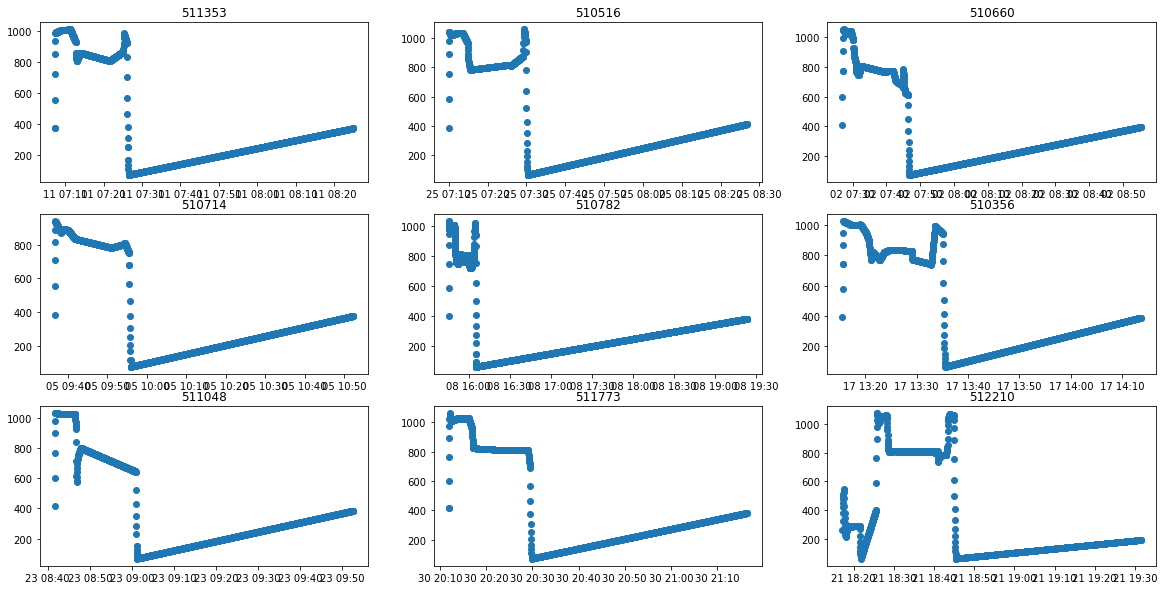

In [46]:
rand_ts_plot(train_data['produv'], 'RAS')

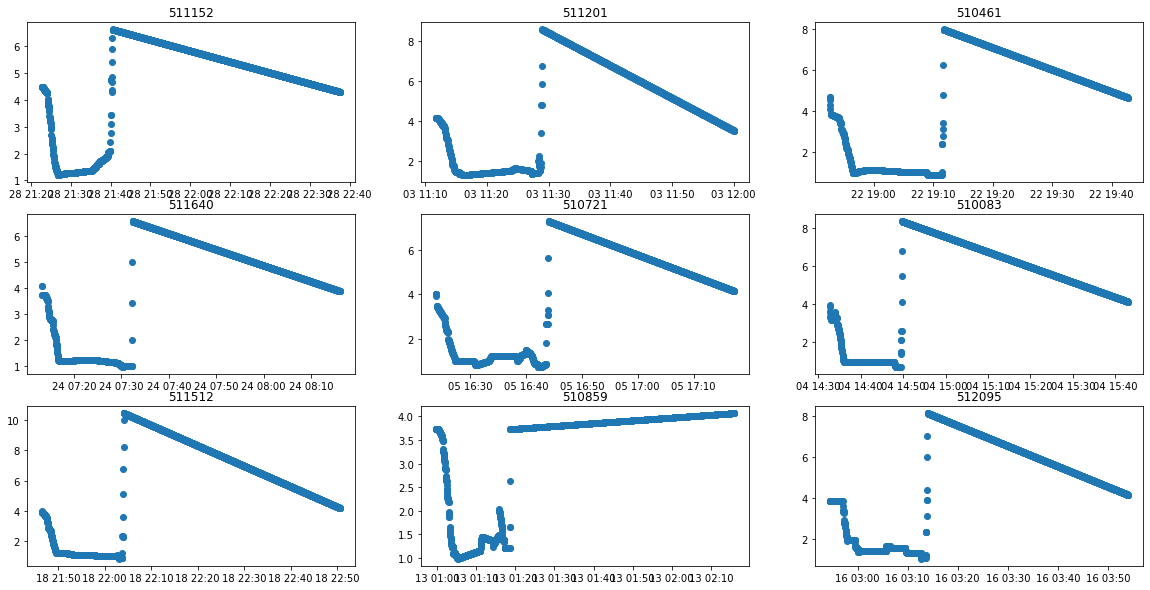

In [47]:
rand_ts_plot(train_data['produv'], 'POL')

 Сыпучие добавки, используемые в технологическом процессе

In [28]:
train_data['sip'].head()

,NPLV,VDSYP,NMSYP,VSSYP,DAT_OTD
0,510008,346,Уголь ТО,570,2021-01-01 03:03:53
1,510008,346,Уголь ТО,220,2021-01-01 03:04:10
2,510008,408,изв_ЦОИ,7300,2021-01-01 03:08:17
3,510008,346,Уголь ТО,270,2021-01-01 03:09:03
4,510008,346,Уголь ТО,430,2021-01-01 03:09:20


In [20]:
train_data['sip']['NMSYP'].value_counts()

изв_ЦОИ       19055
Уголь ТО       7747
ФЛЮМАГ         2930
Флюс ФОМИ      1624
изв отсев       226
Долом(сыр)        2
Name: NMSYP, dtype: int64